In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('ner-symptoms.csv')

In [4]:
df

Unnamed: 0  VAERS_ID   VAX_TYPE   
0               0   2728994    COVID19  \
1               1   2729004    COVID19   
2               2   2729006    COVID19   
3               5   2729010  COVID19-2   
4               6   2729014  COVID19-2   
...           ...       ...        ...   
15899       17420   2802236    COVID19   
15900       17421   2802237    COVID19   
15901       17422   2802238    COVID19   
15902       17423   2802239    COVID19   
15903       17424   2802240    COVID19   

                                            SYMPTOM_TEXT V_ADMINBY  FORM_VERS   
0      muscle at the injection site is sore he cannot...       PHM          2  \
1      micro-seizures starting approximately 2 weeks ...       OTH          2   
2      on september 14 2023 i was admitted to hospita...       PHM          2   
3      0300 12/30/23 fever 102 degrees by oral thermo...       PHM          2   
4      patients husband reported symptoms of prolonge...       PHM          2   
...                                                  ...       ...        ...   
15899  covid pfizer vaccine was stored in the freezer...       UNK          2   
15900  covid pfizer vaccine was stored in the freezer...       UNK          2   
15901  covid pfizer vaccine was stored in the freezer...       UNK          2   
15902  covid pfizer vaccine was stored in the freezer...       UNK          2   
15903  covid pfizer vaccine was stored in the freezer...       UNK          2   

                                      Extracted_Symptoms  
0      ['muscle', 'injection site', 'sore', 'lift', '...  
1      ['micro-seizures', 'approximately', 'weeks', '...  
2      ['admitted to hospital', 'endocarditis', 'bact...  
3      ['fever', 'degrees', 'oral thermometer aches',...  
4      ['patients', 'husband', 'symptoms', 'prolonged...  
...                                                  ...  
15899  ['pfizer vaccine', 'stored', 'freezer', 'arriv...  
15900  ['pfizer vaccine', 'stored', 'freezer', 'arriv...  
15901  ['pfizer vaccine', 'stored', 'freezer', 'arriv...  
15902  ['pfizer vaccine', 'stored', 'freezer', 'arriv...  
15903  ['pfizer vaccine', 'stored', 'freezer', 'arriv...  

[15904 rows x 7 columns]

In [5]:
df.drop(columns=['Unnamed: 0'])

VAERS_ID   VAX_TYPE                                       SYMPTOM_TEXT   
0       2728994    COVID19  muscle at the injection site is sore he cannot...  \
1       2729004    COVID19  micro-seizures starting approximately 2 weeks ...   
2       2729006    COVID19  on september 14 2023 i was admitted to hospita...   
3       2729010  COVID19-2  0300 12/30/23 fever 102 degrees by oral thermo...   
4       2729014  COVID19-2  patients husband reported symptoms of prolonge...   
...         ...        ...                                                ...   
15899   2802236    COVID19  covid pfizer vaccine was stored in the freezer...   
15900   2802237    COVID19  covid pfizer vaccine was stored in the freezer...   
15901   2802238    COVID19  covid pfizer vaccine was stored in the freezer...   
15902   2802239    COVID19  covid pfizer vaccine was stored in the freezer...   
15903   2802240    COVID19  covid pfizer vaccine was stored in the freezer...   

      V_ADMINBY  FORM_VERS                                 Extracted_Symptoms  
0           PHM          2  ['muscle', 'injection site', 'sore', 'lift', '...  
1           OTH          2  ['micro-seizures', 'approximately', 'weeks', '...  
2           PHM          2  ['admitted to hospital', 'endocarditis', 'bact...  
3           PHM          2  ['fever', 'degrees', 'oral thermometer aches',...  
4           PHM          2  ['patients', 'husband', 'symptoms', 'prolonged...  
...         ...        ...                                                ...  
15899       UNK          2  ['pfizer vaccine', 'stored', 'freezer', 'arriv...  
15900       UNK          2  ['pfizer vaccine', 'stored', 'freezer', 'arriv...  
15901       UNK          2  ['pfizer vaccine', 'stored', 'freezer', 'arriv...  
15902       UNK          2  ['pfizer vaccine', 'stored', 'freezer', 'arriv...  
15903       UNK          2  ['pfizer vaccine', 'stored', 'freezer', 'arriv...  

[15904 rows x 6 columns]

In [6]:
df.rename(columns={
    'VAERS_ID': 'VAERS_ID',
    'SYMPTOM_TEXT': 'SYMPTOM_TEXT',
    'Extracted_Symptoms': 'SYMPTOM_LIST'
}, inplace=True)

# Display the updated DataFrame to check the new column names
print(df.head())

   Unnamed: 0  VAERS_ID   VAX_TYPE   
0           0   2728994    COVID19  \
1           1   2729004    COVID19   
2           2   2729006    COVID19   
3           5   2729010  COVID19-2   
4           6   2729014  COVID19-2   

                                        SYMPTOM_TEXT V_ADMINBY  FORM_VERS   
0  muscle at the injection site is sore he cannot...       PHM          2  \
1  micro-seizures starting approximately 2 weeks ...       OTH          2   
2  on september 14 2023 i was admitted to hospita...       PHM          2   
3  0300 12/30/23 fever 102 degrees by oral thermo...       PHM          2   
4  patients husband reported symptoms of prolonge...       PHM          2   

                                        SYMPTOM_LIST  
0  ['muscle', 'injection site', 'sore', 'lift', '...  
1  ['micro-seizures', 'approximately', 'weeks', '...  
2  ['admitted to hospital', 'endocarditis', 'bact...  
3  ['fever', 'degrees', 'oral thermometer aches',...  
4  ['patients', 'husband', 'sympt

In [7]:
df.drop(columns=['Unnamed: 0'], inplace = True)

In [8]:
df = df[['VAERS_ID', 'SYMPTOM_TEXT', 'SYMPTOM_LIST']]

In [9]:
# Length of symptom texts
df['SYMPTOM_TEXT_LENGTH'] = df['SYMPTOM_TEXT'].str.len()
df['SYMPTOM_LIST_LENGTH'] = df['SYMPTOM_LIST'].apply(lambda x: len(eval(x)))  # Assumes string representation of a list
print("\nLength of SYMPTOM_TEXT and SYMPTOM_LIST added to DataFrame.")


/var/folders/ck/hmsclsfj6y1d_pbb28pqpv_h0000gn/T/ipykernel_79261/3196175159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SYMPTOM_TEXT_LENGTH'] = df['SYMPTOM_TEXT'].str.len()



Length of SYMPTOM_TEXT and SYMPTOM_LIST added to DataFrame.


/var/folders/ck/hmsclsfj6y1d_pbb28pqpv_h0000gn/T/ipykernel_79261/3196175159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SYMPTOM_LIST_LENGTH'] = df['SYMPTOM_LIST'].apply(lambda x: len(eval(x)))  # Assumes string representation of a list


In [10]:
# Filter out rows where 'SYMPTOM_LIST' is exactly "[]"
df1 = df[df['SYMPTOM_LIST'] != "[]"]

for symptom_list in df1['SYMPTOM_LIST']:
    x = symptom_list.strip('[]')
    symptoms = [symptom.strip().strip("'") for symptom in x.split(',')]
    print(symptoms)



['muscle', 'injection site', 'sore', 'lift', 'pounds arm soreness', 'non-serious case', 'consumer', 'representative', 'occurrence', 'injection site', 'muscle pain', 'adult', 'male', 'patient', 'rsvpref3', 'adjuvanted', 'arexvy', 'prophylaxis', 'co-suspect products', 'influenza vaccine', 'prophylaxis', 'tozinameran pfizer biontech coronavirus disease', 'vaccine', 'prophylaxis', 'patient', 'right arm influenza vaccine', 'left arm', 'pfizer biontech coronavirus disease', 'vaccine', 'left arm', 'arexvy', 'patient', 'injection site', 'muscle pain verbatim muscle', 'injection site', 'sore activities', 'daily', 'lift', 'pounds', 'pain', 'arm verbatim arm', 'soreness', 'outcome', 'injection site', 'muscle pain', 'activities', 'daily', 'living impaired', 'outcome', 'pain', 'reporter', 'injection site', 'muscle pain', 'daily', 'living impaired', 'pain', 'company', 'injection site', 'muscle pain', 'daily', 'living impaired', 'pain', 'information gsk', 'receipt', 'reporter', 'patient', 'patient', 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# 1. Basic Overview
print("First few rows of the dataset:")
print(df1.head())




First few rows of the dataset:
   VAERS_ID                                       SYMPTOM_TEXT   
0   2728994  muscle at the injection site is sore he cannot...  \
1   2729004  micro-seizures starting approximately 2 weeks ...   
2   2729006  on september 14 2023 i was admitted to hospita...   
3   2729010  0300 12/30/23 fever 102 degrees by oral thermo...   
4   2729014  patients husband reported symptoms of prolonge...   

                                        SYMPTOM_LIST  SYMPTOM_TEXT_LENGTH   
0  ['muscle', 'injection site', 'sore', 'lift', '...               1894.0  \
1  ['micro-seizures', 'approximately', 'weeks', '...                647.0   
2  ['admitted to hospital', 'endocarditis', 'bact...                691.0   
3  ['fever', 'degrees', 'oral thermometer aches',...                211.0   
4  ['patients', 'husband', 'symptoms', 'prolonged...                144.0   

   SYMPTOM_LIST_LENGTH  
0                   93  
1                   26  
2                   29  
3        

In [12]:
# 2. Summary Statistics
print("\nData types and non-null counts:")
print(df1.info())
print("\nDescriptive statistics:")
print(df1.describe(include='all'))


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
Index: 15718 entries, 0 to 15903
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   VAERS_ID             15718 non-null  int64  
 1   SYMPTOM_TEXT         15718 non-null  object 
 2   SYMPTOM_LIST         15718 non-null  object 
 3   SYMPTOM_TEXT_LENGTH  15718 non-null  float64
 4   SYMPTOM_LIST_LENGTH  15718 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 736.8+ KB
None

Descriptive statistics:
            VAERS_ID                     SYMPTOM_TEXT   
count   1.571800e+04                            15718  \
unique           NaN                            13611   
top              NaN  covid-19 breakthrough infection   
freq             NaN                              134   
mean    2.765863e+06                              NaN   
std     2.327019e+04                              NaN   
min     2.728994e+06 

In [13]:


# Count unique values
print("\nUnique counts for each column:")
print(df1.nunique())



Unique counts for each column:
VAERS_ID               15718
SYMPTOM_TEXT           13611
SYMPTOM_LIST           13265
SYMPTOM_TEXT_LENGTH     3239
SYMPTOM_LIST_LENGTH      360
dtype: int64


In [14]:

# 3. Missing Values
print("\nMissing values in each column:")
print(df1.isnull().sum())



Missing values in each column:
VAERS_ID               0
SYMPTOM_TEXT           0
SYMPTOM_LIST           0
SYMPTOM_TEXT_LENGTH    0
SYMPTOM_LIST_LENGTH    0
dtype: int64


In [15]:
# 4. Data Distribution
# Value counts of symptoms
print("\nValue counts for symptom lists:")
print(df1['SYMPTOM_LIST'].value_counts().head(10))  # Top 10 most frequent symptoms



Value counts for symptom lists:
SYMPTOM_LIST
['patient', 'administered', 'vaccine', 'days']                         278
['covid-19']                                                           135
['vaccine', 'patient']                                                 131
['vaccine', 'expired', 'adverse effects']                              115
['vaccine', 'administered', 'bud', 'vaccine', 'outcome', 'vaccine']    102
['patient', 'vaccinated', 'viability']                                 101
['vaccine', 'no symptoms']                                              93
['hospitalized']                                                        72
['adult', 'pediatric', 'dose', 'no adverse outcome']                    70
['patient', 'administered', 'covid-19 vaccine', 'days']                 52
Name: count, dtype: int64


In [16]:
df1

VAERS_ID                                       SYMPTOM_TEXT   
0       2728994  muscle at the injection site is sore he cannot...  \
1       2729004  micro-seizures starting approximately 2 weeks ...   
2       2729006  on september 14 2023 i was admitted to hospita...   
3       2729010  0300 12/30/23 fever 102 degrees by oral thermo...   
4       2729014  patients husband reported symptoms of prolonge...   
...         ...                                                ...   
15899   2802236  covid pfizer vaccine was stored in the freezer...   
15900   2802237  covid pfizer vaccine was stored in the freezer...   
15901   2802238  covid pfizer vaccine was stored in the freezer...   
15902   2802239  covid pfizer vaccine was stored in the freezer...   
15903   2802240  covid pfizer vaccine was stored in the freezer...   

                                            SYMPTOM_LIST  SYMPTOM_TEXT_LENGTH   
0      ['muscle', 'injection site', 'sore', 'lift', '...               1894.0  \
1      ['micro-seizures', 'approximately', 'weeks', '...                647.0   
2      ['admitted to hospital', 'endocarditis', 'bact...                691.0   
3      ['fever', 'degrees', 'oral thermometer aches',...                211.0   
4      ['patients', 'husband', 'symptoms', 'prolonged...                144.0   
...                                                  ...                  ...   
15899  ['pfizer vaccine', 'stored', 'freezer', 'arriv...                142.0   
15900  ['pfizer vaccine', 'stored', 'freezer', 'arriv...                142.0   
15901  ['pfizer vaccine', 'stored', 'freezer', 'arriv...                142.0   
15902  ['pfizer vaccine', 'stored', 'freezer', 'arriv...                142.0   
15903  ['pfizer vaccine', 'stored', 'freezer', 'arriv...                142.0   

       SYMPTOM_LIST_LENGTH  
0                       93  
1                       26  
2                       29  
3                        8  
4                       10  
...                    ...  
15899                    8  
15900                    8  
15901                    8  
15902                    8  
15903                    8  

[15718 rows x 5 columns]

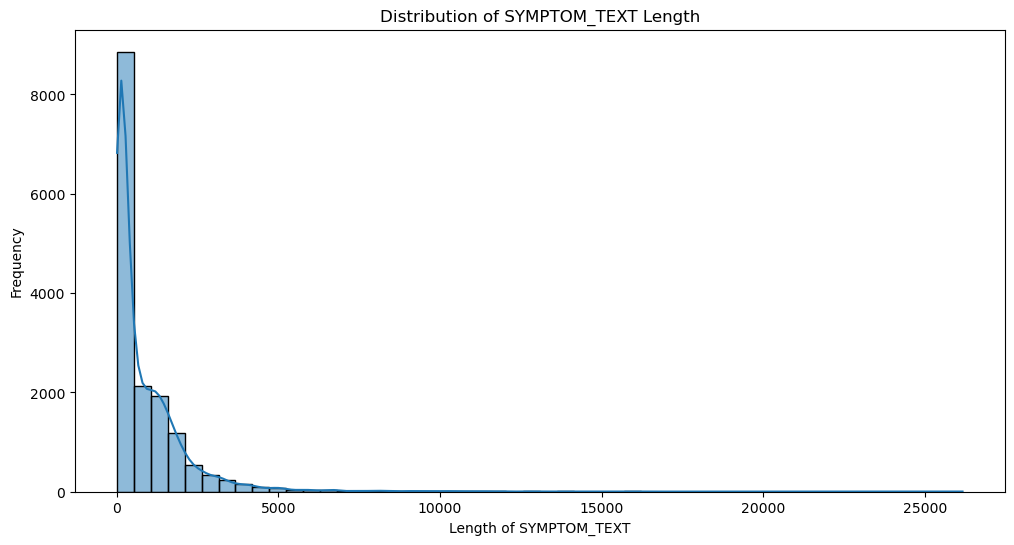

In [17]:

# Visualizing lengths
plt.figure(figsize=(12, 6))
sns.histplot(df1['SYMPTOM_TEXT_LENGTH'], bins=50, kde=True)
plt.title('Distribution of SYMPTOM_TEXT Length')
plt.xlabel('Length of SYMPTOM_TEXT')
plt.ylabel('Frequency')
plt.show()

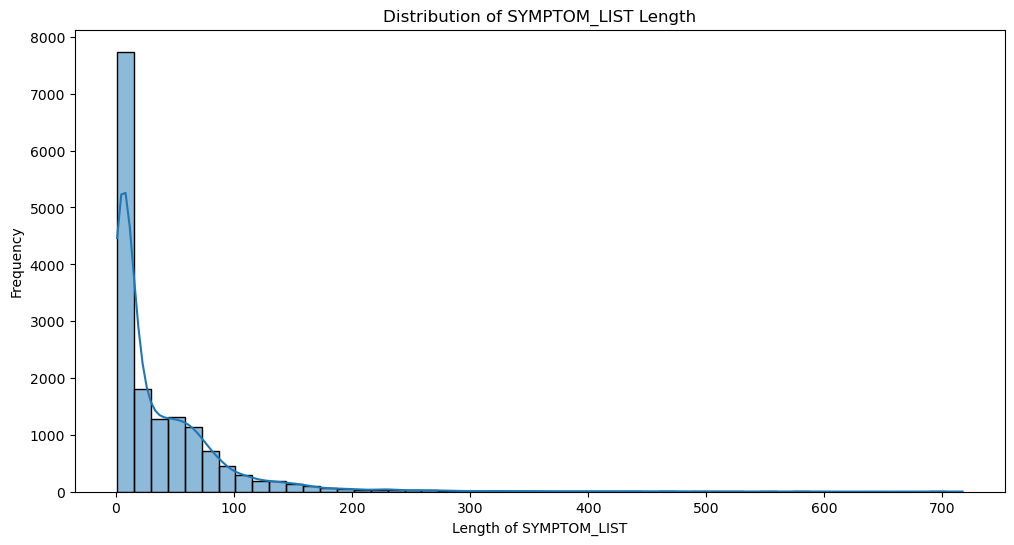

In [18]:

plt.figure(figsize=(12, 6))
sns.histplot(df1['SYMPTOM_LIST_LENGTH'], bins=50, kde=True)
plt.title('Distribution of SYMPTOM_LIST Length')
plt.xlabel('Length of SYMPTOM_LIST')
plt.ylabel('Frequency')
plt.show()

In [19]:
# 5. Duplicates
print("\nNumber of duplicate rows:")
print(df1.duplicated().sum())


Number of duplicate rows:
0


In [20]:
# 6. Data Quality Checks
# Check for string quality
df1['SYMPTOM_TEXT'] = df1['SYMPTOM_TEXT'].str.strip()  # Remove leading/trailing whitespace
df1['SYMPTOM_TEXT'] = df1['SYMPTOM_TEXT'].str.lower() 
df1['SYMPTOM_LIST'] = df1['SYMPTOM_LIST'].str.lower()  # Convert to lowercase


/var/folders/ck/hmsclsfj6y1d_pbb28pqpv_h0000gn/T/ipykernel_79261/163987829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['SYMPTOM_TEXT'] = df1['SYMPTOM_TEXT'].str.strip()  # Remove leading/trailing whitespace
/var/folders/ck/hmsclsfj6y1d_pbb28pqpv_h0000gn/T/ipykernel_79261/163987829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['SYMPTOM_TEXT'] = df1['SYMPTOM_TEXT'].str.lower()
/var/folders/ck/hmsclsfj6y1d_pbb28pqpv_h0000gn/T/ipykernel_79261/163987829.py:5: SettingWithCopyWarning: 
A valu

In [21]:
df1

VAERS_ID                                       SYMPTOM_TEXT   
0       2728994  muscle at the injection site is sore he cannot...  \
1       2729004  micro-seizures starting approximately 2 weeks ...   
2       2729006  on september 14 2023 i was admitted to hospita...   
3       2729010  0300 12/30/23 fever 102 degrees by oral thermo...   
4       2729014  patients husband reported symptoms of prolonge...   
...         ...                                                ...   
15899   2802236  covid pfizer vaccine was stored in the freezer...   
15900   2802237  covid pfizer vaccine was stored in the freezer...   
15901   2802238  covid pfizer vaccine was stored in the freezer...   
15902   2802239  covid pfizer vaccine was stored in the freezer...   
15903   2802240  covid pfizer vaccine was stored in the freezer...   

                                            SYMPTOM_LIST  SYMPTOM_TEXT_LENGTH   
0      ['muscle', 'injection site', 'sore', 'lift', '...               1894.0  \
1      ['micro-seizures', 'approximately', 'weeks', '...                647.0   
2      ['admitted to hospital', 'endocarditis', 'bact...                691.0   
3      ['fever', 'degrees', 'oral thermometer aches',...                211.0   
4      ['patients', 'husband', 'symptoms', 'prolonged...                144.0   
...                                                  ...                  ...   
15899  ['pfizer vaccine', 'stored', 'freezer', 'arriv...                142.0   
15900  ['pfizer vaccine', 'stored', 'freezer', 'arriv...                142.0   
15901  ['pfizer vaccine', 'stored', 'freezer', 'arriv...                142.0   
15902  ['pfizer vaccine', 'stored', 'freezer', 'arriv...                142.0   
15903  ['pfizer vaccine', 'stored', 'freezer', 'arriv...                142.0   

       SYMPTOM_LIST_LENGTH  
0                       93  
1                       26  
2                       29  
3                        8  
4                       10  
...                    ...  
15899                    8  
15900                    8  
15901                    8  
15902                    8  
15903                    8  

[15718 rows x 5 columns]

/var/folders/ck/hmsclsfj6y1d_pbb28pqpv_h0000gn/T/ipykernel_79261/3043723193.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['SYMPTOM_LIST'] = df1['SYMPTOM_LIST'].apply(lambda x: list(set(eval(x))) if isinstance(x, str) else x)


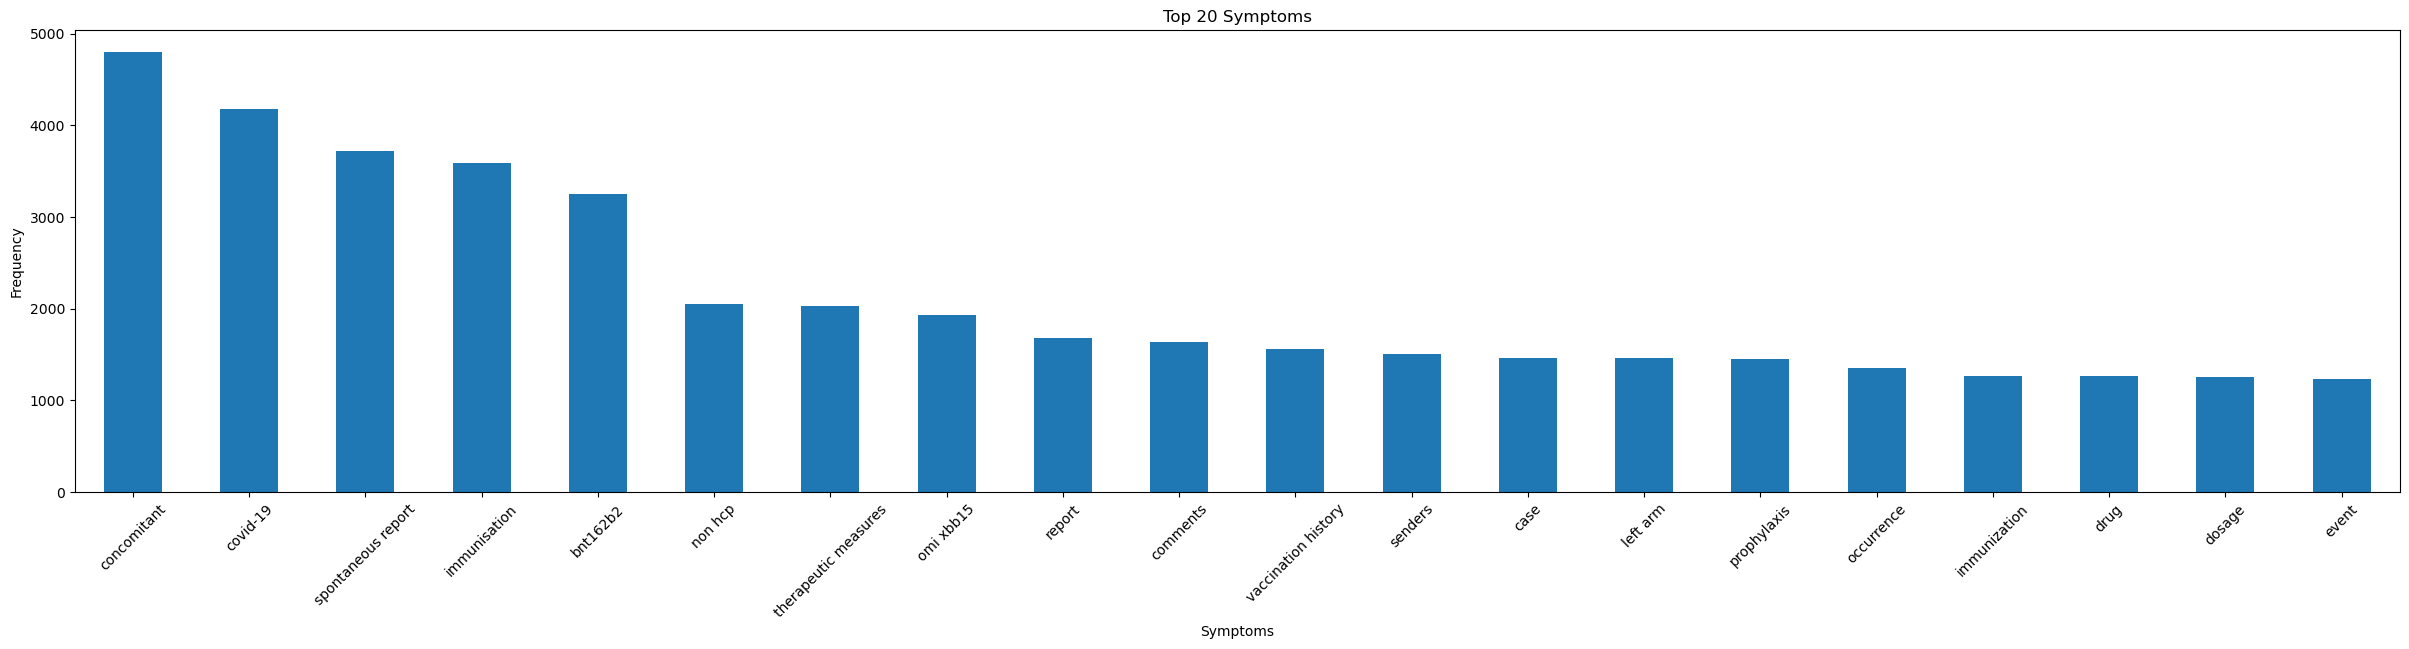

In [ ]:

# 7. Visualizations
excluded_words = {'patient', 'patients', 'vaccine', 'medical history','symptoms','treatment','administered', 'information', 'medications','batch/lot number','vaccination','coronavirus disease','outcome', 'dose','consumer', 'age','female','days','day','medically significant','requested','vaccines','male', 'years', 'time', 'formula'}

df1['SYMPTOM_LIST'] = df1['SYMPTOM_LIST'].apply(lambda x: list(set(eval(x))) if isinstance(x, str) else x)
filtered_symptoms = df1['SYMPTOM_LIST'].explode().dropna()
filtered_symptoms = filtered_symptoms[~filtered_symptoms.isin(excluded_words)]

symptom_counts = filtered_symptoms.value_counts()

plt.figure(figsize=(30, 6))
symptom_counts[:20].plot(kind='bar')
plt.title('Top 20 Symptoms')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



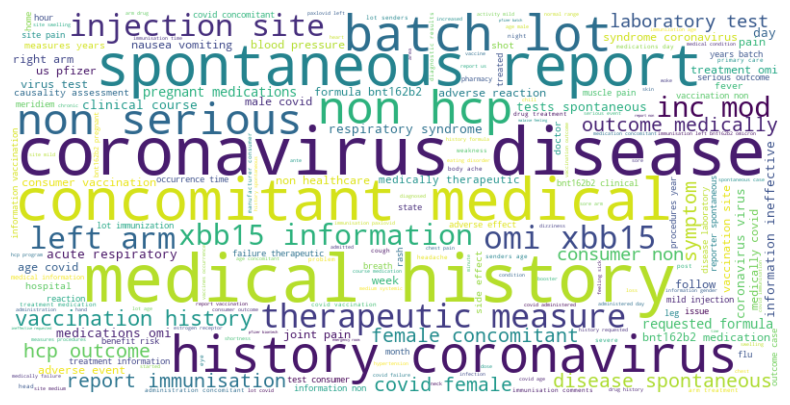

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def get_unique_symptoms(symptom_list):
    if isinstance(symptom_list, str):  
        try:
            symptom_list = eval(symptom_list) 
        except (SyntaxError, NameError):  
            return ''
    elif not isinstance(symptom_list, list): 
        return ''

    unique_symptoms = set(symptom_list)
    return ' '.join(unique_symptoms)

unique_symptoms_list = df1['SYMPTOM_LIST'].apply(get_unique_symptoms)

text_for_word_cloud = ' '.join(unique_symptoms_list)

excluded_words = {'WAS', 'CAN', 'patient', 'patients', 'vaccine', 'dose', 'lot', 'number', 'year', 'significant'}

filtered_text = ' '.join(word for word in text_for_word_cloud.split() if word.lower() not in excluded_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:

# 8. Correlation and Relationships
grouped_df1 = df1.groupby('VAERS_ID')['SYMPTOM_LIST'].apply(list).reset_index()
print("\nGrouped symptoms by VAERS_ID:")
print(grouped_df1.head())

# 9. Prepare for NLP
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = text.lower()  # Lowercase
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

df1['CLEANED_SYMPTOM_TEXT'] = df1['SYMPTOM_TEXT'].apply(clean_text)

print("\nCleaned SYMPTOM_TEXT added to DataFrame.")


Grouped symptoms by VAERS_ID:
   VAERS_ID                                       SYMPTOM_LIST
0   2728994  [[prophylaxis, living impaired, muscle pain ve...
1   2729004  [[symptoms, intensive care unit stay diagnosed...
2   2729006  [[endocarditis, weeks, iv penicillin gram, cou...
3   2729010  [[pains fatigue chills, fever, degrees, oral t...
4   2729014  [[shoulder pain, urgent care, symptoms, husban...


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/snehadharne/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/snehadharne/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Cleaned SYMPTOM_TEXT added to DataFrame.


/var/folders/ck/hmsclsfj6y1d_pbb28pqpv_h0000gn/T/ipykernel_79261/1456338071.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CLEANED_SYMPTOM_TEXT'] = df1['SYMPTOM_TEXT'].apply(clean_text)


In [26]:
df1['SYMPTOM_LIST'][4:10]

4    [shoulder pain, urgent care, symptoms, husband...
5     [prednisone, hives, prescribed, patient, doctor]
6                                      [wrist, thighs]
7    [inj, symptoms, compare, info, receipt, flu, s...
8    [xray shoulder chronic separation, discharge r...
9    [floaters, months, weeks, next morning, dots, ...
Name: SYMPTOM_LIST, dtype: object

Associative Analysis on tokenization by en_core_sci_md model

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from collections import Counter

symptom_list = df1['SYMPTOM_LIST'].explode() 
symptom_counts = Counter(symptom_list)         
grand_dict_of_symptoms = dict(symptom_counts) 

In [ ]:
import ast

df1['SYMPTOM_LIST'] = df1['SYMPTOM_LIST'].apply(lambda x: ast.literal_eval(x.strip()) if isinstance(x, str) else x)

df1['SYMPTOM_LIST'] = df1['SYMPTOM_LIST'].apply(lambda x: x.strip('[]').split(', ') if isinstance(x, str) else x)

print(df1[['VAERS_ID', 'SYMPTOM_LIST']])

       VAERS_ID                                       SYMPTOM_LIST
0       2728994  [prophylaxis, living impaired, muscle pain ver...
1       2729004  [symptoms, intensive care unit stay diagnosed,...
2       2729006  [endocarditis, weeks, iv penicillin gram, cour...
3       2729010  [pains fatigue chills, fever, degrees, oral th...
4       2729014  [shoulder pain, urgent care, symptoms, husband...
...         ...                                                ...
15899   2802236  [arrival, re-vaccination, discovery, pfizer va...
15900   2802237  [arrival, re-vaccination, discovery, pfizer va...
15901   2802238  [arrival, re-vaccination, discovery, pfizer va...
15902   2802239  [arrival, re-vaccination, discovery, pfizer va...
15903   2802240  [arrival, re-vaccination, discovery, pfizer va...

[15718 rows x 2 columns]


/var/folders/ck/hmsclsfj6y1d_pbb28pqpv_h0000gn/T/ipykernel_79261/1433918512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['SYMPTOM_LIST'] = df1['SYMPTOM_LIST'].apply(lambda x: ast.literal_eval(x.strip()) if isinstance(x, str) else x)
/var/folders/ck/hmsclsfj6y1d_pbb28pqpv_h0000gn/T/ipykernel_79261/1433918512.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['SYMPTOM_LIST'] = df1['SYMPTOM_LIST'].apply(lambda x: x.strip('[]').split(', ') if isinstance(x, str) else x)


: 

Kernel crash due to extensive number and variety of keywords due to ineffective NER of symptom texts